In [61]:
from tensorflow.keras.applications import VGG16
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras import optimizers
import numpy as np

In [30]:
conv_base = VGG16(weights = 'imagenet', 
                  include_top = False, input_shape = (224,224,3))

In [31]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [124]:
model = keras.models.Sequential()
model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

In [125]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 771       
Total params: 21,138,243
Trainable params: 6,423,555
Non-trainable params: 14,714,688
_________________________________________________________________


In [34]:
conv_base.trainable = False
print(len(model.trainable_weights))

4


In [35]:
train_dir = 'C:/Users/DELL/Documents/GitHub/covid-x-ray-classification/data/train'
test_dir = 'C:/Users/DELL/Documents/GitHub/covid-x-ray-classification/data/test'
dev_dir = 'C:/Users/DELL/Documents/GitHub/covid-x-ray-classification/data/validation'

In [94]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,batch_size=20,target_size=(224, 224),
                                                    class_mode='categorical', shuffle =True, seed = 42)
dev_datagen = ImageDataGenerator(rescale=1./255)
dev_generator = dev_datagen.flow_from_directory(dev_dir,target_size=(224, 224),
                                                class_mode='categorical', shuffle =True, seed = 42)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,batch_size=20,target_size=(224, 224),
                                                  class_mode='categorical', shuffle = False, seed=42)

Found 2560 images belonging to 3 classes.
Found 176 images belonging to 3 classes.
Found 169 images belonging to 3 classes.


In [95]:
train_generator.filepaths[0]

'C:/Users/DELL/Documents/GitHub/covid-x-ray-classification/data/train\\covid\\COVID-19 (1).png'

In [96]:
img = image.load_img(train_generator.filepaths[0], target_size=(224,224))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

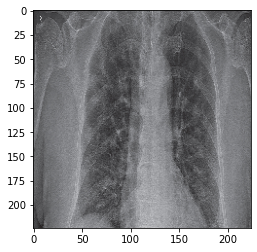

In [97]:
plt.imshow(image.array_to_img(x[0]))

In [126]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(),metrics=['acc'])

In [127]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=dev_generator.n//dev_generator.batch_size
#history = model.fit_generator(train_generator,steps_per_epoch= 100, epochs=3,
#                    validation_data=dev_generator, validation_steps=50)
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=dev_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=20)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 128 steps, validate for 5 steps
Epoch 1/20
128/128 [==============================] - 52s 403ms/step - loss: 0.7679 - acc: 0.8426 - val_loss: 0.1721 - val_acc: 0.9250
Epoch 2/20
128/128 [==============================] - 51s 399ms/step - loss: 0.1709 - acc: 0.9418 - val_loss: 0.0984 - val_acc: 0.9625
Epoch 3/20
128/128 [==============================] - 51s 400ms/step - loss: 0.1674 - acc: 0.9430 - val_loss: 0.1295 - val_acc: 0.9563
Epoch 4/20
128/128 [==============================] - 51s 399ms/step - loss: 0.1536 - acc: 0.9434 - val_loss: 0.1152 - val_acc: 0.9312
Epoch 5/20
128/128 [==============================] - 51s 401ms/step - loss: 0.1227 - acc: 0.9574 - val_loss: 0.0812 - val_acc: 0.9500
Epoch 6/20
128/128 [==============================] - 54s 418ms/step - loss: 0.1092 - acc: 0.9582 - val_loss: 0.1101 - val_acc: 0.9563
Epoch 7/20
128/128 [==============================] - 51s 402ms/step - loss: 0.1016 - acc: 0.9602 

In [144]:
#model.save_weights("model-vgg-16.h5")

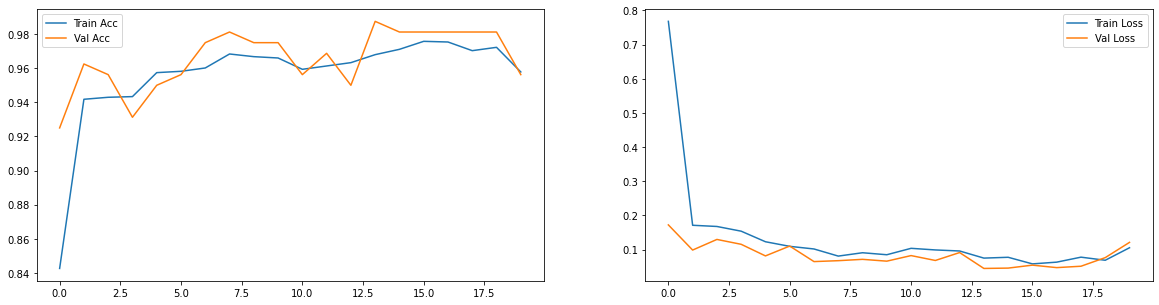

In [133]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.plot(history.history['acc'], label = 'Train Acc')
plt.plot(history.history['val_acc'], label = 'Val Acc')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend()

In [134]:
filenames = test_generator.filenames
nb_samples = len(filenames)
predict = model.predict(test_generator)

In [135]:
preds = []
for i in range(len(predict)):
    preds.append(np.argmax(predict[i, :]))   

In [137]:
#test_generator.classes

In [138]:
test_generator.class_indices

{'covid': 0, 'normal': 1, 'viral': 2}

In [139]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [140]:
confusion_matrix(test_generator.classes, preds)

array([[20,  2,  7],
       [ 2, 68,  0],
       [ 0,  3, 67]], dtype=int64)

In [143]:
print(classification_report(test_generator.classes, preds))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78        29
           1       0.93      0.97      0.95        70
           2       0.91      0.96      0.93        70

    accuracy                           0.92       169
   macro avg       0.92      0.87      0.89       169
weighted avg       0.92      0.92      0.91       169

